In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, classification_report)

In [3]:
data = pd.read_csv('emails.csv')
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
data.info

<bound method DataFrame.info of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrast

In [5]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [6]:
data.shape

(5172, 3002)

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(5172, 3002)

In [10]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)


KNN Accuracy: 0.8338164251207729
KNN Precision: 0.6434977578475336
KNN Recall: 0.9566666666666667
KNN F1-Score: 0.7694369973190348


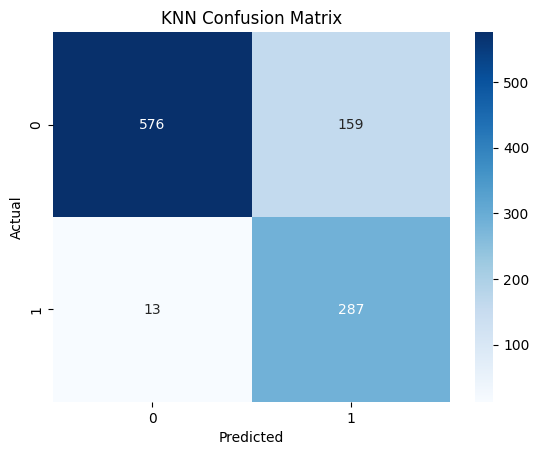

In [18]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Precision:", precision_score(y_test, y_pred_knn))
print("KNN Recall:", recall_score(y_test, y_pred_knn))
print("KNN F1-Score:", f1_score(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [19]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)


SVM Accuracy: 0.9507246376811594
SVM Precision: 0.9136212624584718
SVM Recall: 0.9166666666666666
SVM F1-Score: 0.9151414309484193


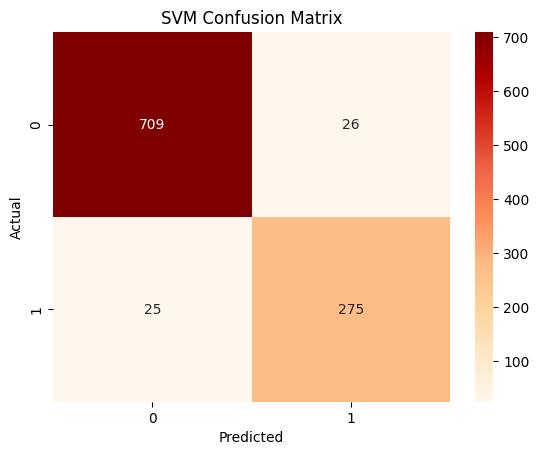

In [20]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Precision:", precision_score(y_test, y_pred_svm))
print("SVM Recall:", recall_score(y_test, y_pred_svm))
print("SVM F1-Score:", f1_score(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='OrRd')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
results = pd.DataFrame({
    'Model': ['KNN', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_svm)],
    'Precision': [precision_score(y_test, y_pred_knn),
                  precision_score(y_test, y_pred_svm)],
    'Recall': [recall_score(y_test, y_pred_knn),
               recall_score(y_test, y_pred_svm)],
    'F1_Score': [f1_score(y_test, y_pred_knn),
                 f1_score(y_test, y_pred_svm)]
})
print(results)


  Model  Accuracy  Precision    Recall  F1_Score
0   KNN  0.833816   0.643498  0.956667  0.769437
1   SVM  0.950725   0.913621  0.916667  0.915141
